In [176]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
import matplotlib.pyplot as plt

In [179]:
from matplotlib import font_manager, rc
import matplotlib
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

In [139]:
bus2401_df = pd.read_csv("./Data/2024년_버스노선별_정류장별_시간대별_승하차_인원_정보(01월).csv")

C:\Users\ITSC\AppData\Local\Temp\ipykernel_11688\2719430853.py:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  bus2401_df = pd.read_csv("./Data/2024년_버스노선별_정류장별_시간대별_승하차_인원_정보(01월).csv")


In [140]:
bus2401_df.loc[bus2401_df["역명"].str.contains("송파역")]

,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,...,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,교통수단타입코드,교통수단타입명,등록일자
35244,202401,9403,9403번(구미동차고지~중곡역),123000007,24007,송파역(00046),38,56,8,24,...,18,7,23,1,21,15,27,50,서울광역버스,20240203
35245,202401,3217,3217번(송파차고지~어린이대공원),123000007,24007,송파역(00023),0,0,0,0,...,178,69,148,50,143,31,58,20,서울지선버스,20240203
35246,202401,3413,3413번(강일동공영차고지~수서경찰서),123000007,24007,송파역(00063),88,100,0,0,...,247,297,260,263,157,187,143,20,서울지선버스,20240203
35247,202401,3422,3422번(장지공영차고지~한티역),123000007,24007,송파역(00026),0,0,0,0,...,40,214,28,257,36,20,5,20,서울지선버스,20240203
35248,202401,320,320번(송파차고지~상봉터미널),123000007,24007,송파역(00006),0,0,0,0,...,114,222,118,204,103,48,22,10,서울간선버스,20240203
35249,202401,301,301번(장지공영차고지~혜화동),123000007,24007,송파역(00017),0,0,0,0,...,290,146,251,131,137,0,0,10,서울간선버스,20240203
35250,202401,360,360번(송파차고지~여의도),123000007,24007,송파역(00006),0,0,0,0,...,151,146,146,118,119,12,11,10,서울간선버스,20240203
35251,202401,3317,3317(남한산성입구~잠실새내역),123000007,24007,송파역(00016),0,0,0,0,...,150,33,154,22,96,42,68,20,서울지선버스,20240203
35252,202401,303,303번(성남~신설동),123000007,24007,송파역(00032),0,0,0,0,...,255,348,258,240,233,37,50,10,서울간선버스,20240203
35253,202401,345,345번(송파차고지~구반포역),123000007,24007,송파역(00016),0,0,0,0,...,80,52,50,32,85,33,58,10,서울간선버스,20240203


In [137]:
bus_stop_df = pd.read_excel("./Data/서울시버스정류소위치정보(20240305).xlsx")

In [141]:
def convert_to_int(value):
    if isinstance(value, int):
        return value
    else:
        try:
            return int(value)
            
        except:
            return 0

In [142]:
bus2401_df["표준버스정류장ID"] = bus2401_df["표준버스정류장ID"].map(convert_to_int)

In [129]:
int("35244")

35244

In [143]:
bus2401_df.iloc[35244, :]

사용년월                     202401
노선번호                       9403
노선명           9403번(구미동차고지~중곡역)
표준버스정류장ID             123000007
버스정류장ARS번호                24007
역명                   송파역(00046)
00시승차총승객수                    38
00시하차총승객수                    56
1시승차총승객수                      8
1시하차총승객수                     24
2시승차총승객수                      0
2시하차총승객수                      0
3시승차총승객수                      0
3시하차총승객수                      0
4시승차총승객수                      0
4시하차총승객수                      0
5시승차총승객수                      0
5시하차총승객수                      0
6시승차총승객수                      2
6시하차총승객수                      4
7시승차총승객수                      8
7시하차총승객수                     22
8시승차총승객수                      9
8시하차총승객수                     70
9시승차총승객수                      3
9시하차총승객수                     41
10시승차총승객수                     0
10시하차총승객수                    19
11시승차총승객수                     1
11시하차총승객수                    22
12시승차총승객수                     2
12시하차총승객

In [145]:
bus2401_df2 = bus2401_df[bus2401_df["표준버스정류장ID"].isin(bus_stop_df["NODE_ID"])].iloc[:, 3:-3].reset_index()

In [147]:
bus2401_df2["역명"] = bus2401_df2["역명"].str.slice(stop = -7)

In [148]:
bus2401_df2.head()

,index,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,2시승차총승객수,2시하차총승객수,...,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수
0,0,100000001,1001,종로2가사거리,63,99,0,0,0,0,...,340,394,371,261,400,228,327,155,240,125
1,1,100000001,1001,종로2가사거리,0,0,0,0,68,97,...,0,0,0,0,0,0,0,0,0,0
2,2,100000001,1001,종로2가사거리,8,8,187,195,82,91,...,0,0,0,0,0,0,0,0,0,0
3,3,100000001,1001,종로2가사거리,162,123,77,147,0,0,...,338,489,278,256,273,160,252,187,196,138
4,4,100000002,1002,창경궁.서울대학교병원,0,0,0,0,0,0,...,94,24,69,17,46,31,43,24,25,2


In [149]:
bus_in = bus2401_df.iloc[:, 6:54:2].sum(axis = 1)
bus_out = bus2401_df.iloc[:, 7:55:2].sum(axis = 1)

In [150]:
bus2401_df2["탑승승객수"] = bus_in
bus2401_df2["하차승객수"] = bus_out

In [151]:
bus2401_df2 = bus2401_df2.iloc[:, [1, 2, 3, -2, -1]]

In [152]:
bus2401_df2.head()

,표준버스정류장ID,버스정류장ARS번호,역명,탑승승객수,하차승객수
0,100000001,1001,종로2가사거리,7434,6513
1,100000001,1001,종로2가사거리,385,291
2,100000001,1001,종로2가사거리,277,294
3,100000001,1001,종로2가사거리,6150,7130
4,100000002,1002,창경궁.서울대학교병원,2872,4011


In [153]:
bus_stop_df.head()

,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표,정류소타입
0,100000001,1001,종로2가사거리,126.987752,37.569806,중앙차로
1,100000002,1002,창경궁.서울대학교병원,126.996521,37.579433,중앙차로
2,100000003,1003,명륜3가.성대입구,126.998251,37.582580,중앙차로
3,100000004,1004,종로2가.삼일교,126.987613,37.568579,중앙차로
4,100000005,1005,혜화동로터리.여운형활동터,127.001744,37.586243,중앙차로


In [154]:
bus_stop_addr_df = pd.read_csv("./bus_stop_addres.csv")

In [155]:
bus_stop_addr_df

,Unnamed: 0,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표,정류소타입,combined,address
0,0,100000001,1001,종로2가사거리,126.987752,37.569806,중앙차로,"[126.9877522923, 37.5698055407]",종로구
1,1,100000002,1002,창경궁.서울대학교병원,126.996521,37.579433,중앙차로,"[126.9965206101, 37.579432932]",종로구
2,2,100000003,1003,명륜3가.성대입구,126.998251,37.582580,중앙차로,"[126.9982508372, 37.5825800121]",종로구
3,3,100000004,1004,종로2가.삼일교,126.987613,37.568579,중앙차로,"[126.9876130976, 37.5685792736]",종로구
4,4,100000005,1005,혜화동로터리.여운형활동터,127.001744,37.586243,중앙차로,"[127.001744, 37.586243]",종로구
...,...,...,...,...,...,...,...,...,...
11256,11256,124000334,25995,우성아파트,127.139339,37.550386,일반차로,"[127.1393385419, 37.550385732]",강동구
11257,11257,124000333,25996,우성아파트,127.140046,37.550643,일반차로,"[127.1400463819, 37.5506426076]",강동구
11258,11258,124000332,25997,조일약국,127.123596,37.533630,일반차로,"[127.123596182, 37.533630263]",강동구
11259,11259,124000331,25998,성내시장,127.125497,37.536155,일반차로,"[127.1254968434, 37.536154934]",강동구


In [156]:
bus_gu_df = bus_stop_addr_df.groupby("address").count()

In [157]:
bus_stop_addr_df.loc[bus_stop_addr_df["NODE_ID"] == 123000007]

,Unnamed: 0,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표,정류소타입,combined,address
10353,10353,123000007,24007,송파역,127.111838,37.500208,중앙차로,"[127.1118384337, 37.5002084826]",송파구


In [158]:
bus_gu_df.loc[bus_gu_df.iloc[:, 0] > 100]

,Unnamed: 0,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표,정류소타입,combined
address,,,,,,,,
강남구,546,546,546,546,546,546,546,546
강동구,403,403,403,403,403,403,403,403
강북구,412,412,412,412,412,412,412,412
강서구,619,619,619,619,619,619,619,619
관악구,490,490,490,490,490,490,490,490
광진구,296,296,296,296,296,296,296,296
구로구,513,513,513,513,513,513,513,513
금천구,354,354,354,354,354,354,354,354
노원구,518,518,518,518,518,518,518,518


In [159]:
bus_stop_addr_df.head()

,Unnamed: 0,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표,정류소타입,combined,address
0,0,100000001,1001,종로2가사거리,126.987752,37.569806,중앙차로,"[126.9877522923, 37.5698055407]",종로구
1,1,100000002,1002,창경궁.서울대학교병원,126.996521,37.579433,중앙차로,"[126.9965206101, 37.579432932]",종로구
2,2,100000003,1003,명륜3가.성대입구,126.998251,37.582580,중앙차로,"[126.9982508372, 37.5825800121]",종로구
3,3,100000004,1004,종로2가.삼일교,126.987613,37.568579,중앙차로,"[126.9876130976, 37.5685792736]",종로구
4,4,100000005,1005,혜화동로터리.여운형활동터,127.001744,37.586243,중앙차로,"[127.001744, 37.586243]",종로구


In [160]:
bus2401_df3 = pd.merge(bus2401_df2, bus_stop_addr_df, left_on = "표준버스정류장ID", right_on = "NODE_ID", how = "left")

In [161]:
bus2401_df3 = bus2401_df3.iloc[:, [0, 1, 2, 3, 4, -1]]

In [162]:
bus2401_df3.head()

,표준버스정류장ID,버스정류장ARS번호,역명,탑승승객수,하차승객수,address
0,100000001,1001,종로2가사거리,7434,6513,종로구
1,100000001,1001,종로2가사거리,385,291,종로구
2,100000001,1001,종로2가사거리,277,294,종로구
3,100000001,1001,종로2가사거리,6150,7130,종로구
4,100000002,1002,창경궁.서울대학교병원,2872,4011,종로구


In [166]:
bus_pop = bus2401_df3.loc[:, ["탑승승객수", "하차승객수", "address"]].groupby(by = "address").sum()

In [172]:
bus_pop = bus_pop[bus_pop["탑승승객수"] > 100000]

In [187]:
bus_pop = bus_pop.sort_values(by = "탑승승객수", ascending = False)

In [285]:
bus_pop.to_csv("./bus_2401_passenger.csv")

In [282]:
bus_pop =bus_pop.reset_index()

In [283]:
bus_pop

,address,탑승승객수,하차승객수
0,강남구,8866092,8441292
1,관악구,6779508,6830265
2,서초구,6639412,6502958
3,성북구,6046094,6009471
4,영등포구,5931421,5966647
5,서대문구,5836149,5638685
6,송파구,5742044,5745666
7,종로구,5531811,5357018
8,동대문구,5338922,5231785
9,마포구,5142093,5241463


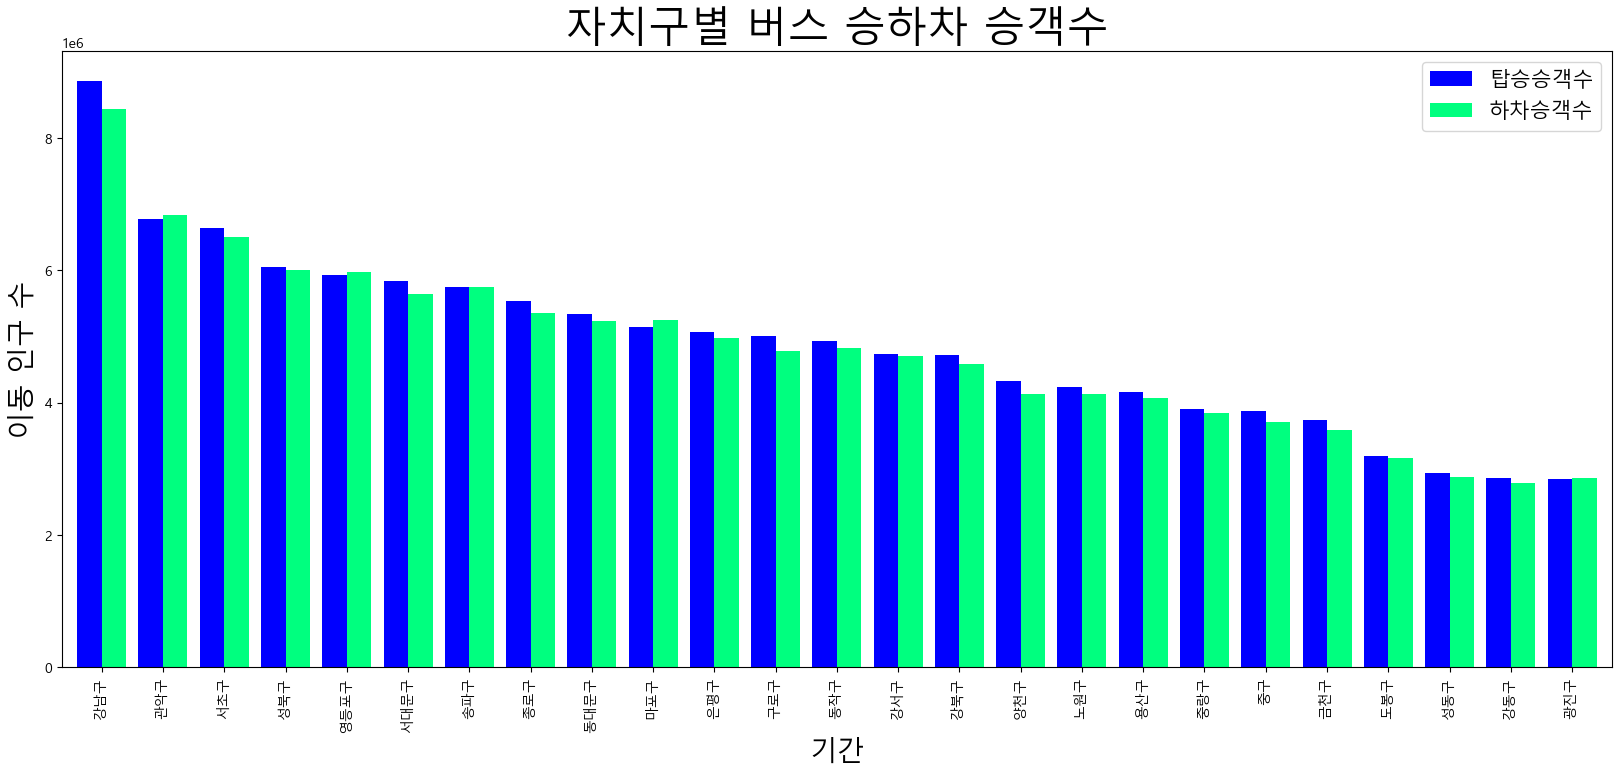

In [188]:
# 막대 그래프 그리기
bus_pop.plot(kind = "bar", figsize = (20, 8), width = 0.8, color = ["blue", "springgreen"])

plt.title("자치구별 버스 승하차 승객수", size = 30)
plt.ylabel("이동 인구 수", size = 20)
plt.xlabel("기간", size = 20)
plt.legend(fontsize = 15)

plt.show()

In [191]:
rent_df = pd.read_csv("./Data/rent_data_group.csv")

In [205]:
region_size = pd.read_csv("./Data/행정구역(구별)_20240314164907.csv", skiprows = 2)

In [241]:
rent_df

,자치구,중대형 지하1층,중대형 1층,중대형 2층,중대형 3층,중대형 4층,중대형 5층,중대형 6-10층,소형 지하1층,소형 1층,소형 2층
0,강남구,22.13,64.54,32.00,25.54,23.36,22.50,21.64,29.43,64.67,33.71
1,강동구,11.10,47.20,20.50,15.20,13.50,12.00,12.10,0.00,56.10,24.70
2,강북구,13.17,45.93,18.90,15.43,12.50,12.93,14.33,13.00,42.60,17.80
3,강서구,10.70,35.20,16.30,14.80,12.30,10.10,9.00,6.20,28.70,13.60
4,관악구,18.40,72.80,28.90,21.95,19.65,21.25,18.05,13.80,65.75,30.85
5,광진구,14.30,52.55,22.80,16.45,15.25,12.95,13.70,16.05,39.40,20.75
6,구로구,11.70,45.20,18.80,13.00,11.70,9.10,0.00,0.00,47.10,28.30
7,금천구,11.70,33.20,14.10,10.60,9.30,11.40,0.00,0.00,31.20,13.20
8,노원구,8.40,29.60,14.40,12.20,10.90,12.10,0.00,10.00,26.00,9.80
9,동대문구,11.38,44.32,18.10,13.70,12.58,12.10,7.70,8.72,42.40,19.38


In [206]:
region_size = region_size.iloc[:, 1:]

In [207]:
region_size.head()

,자치구별(2),면적 (km²),구성비 (%),행정 (개),법정 (개),소계,소계.1
0,소계,605.21,100.00,426,467,12881,96502
1,종로구,23.91,3.95,17,87,279,1475
2,중구,9.96,1.65,15,74,253,1582
3,용산구,21.87,3.61,16,36,357,2601
4,성동구,16.82,2.78,17,17,471,3645


In [242]:
region_df = pd.merge(rent_df, region_size, how = "left", left_on = "자치구", right_on = "자치구별(2)")

In [243]:
region_df = region_df.iloc[:, :-5].dropna().drop(columns = "자치구별(2)")

In [221]:
region_df.to_csv("./Data/rent_data_group.csv")

In [276]:
region_df2 = region_df.iloc[:,[0, 2, 9, 11]]

In [286]:
region_df.to_csv("./seoul_district.csv")

In [249]:
region_df

,자치구,중대형 지하1층,중대형 1층,중대형 2층,중대형 3층,중대형 4층,중대형 5층,중대형 6-10층,소형 지하1층,소형 1층,소형 2층,면적 (km²)
0,강남구,22.13,64.54,32.00,25.54,23.36,22.50,21.64,29.43,64.67,33.71,39.50
1,강동구,11.10,47.20,20.50,15.20,13.50,12.00,12.10,0.00,56.10,24.70,24.59
2,강북구,13.17,45.93,18.90,15.43,12.50,12.93,14.33,13.00,42.60,17.80,23.60
3,강서구,10.70,35.20,16.30,14.80,12.30,10.10,9.00,6.20,28.70,13.60,41.45
4,관악구,18.40,72.80,28.90,21.95,19.65,21.25,18.05,13.80,65.75,30.85,29.57
5,광진구,14.30,52.55,22.80,16.45,15.25,12.95,13.70,16.05,39.40,20.75,17.06
6,구로구,11.70,45.20,18.80,13.00,11.70,9.10,0.00,0.00,47.10,28.30,20.12
7,금천구,11.70,33.20,14.10,10.60,9.30,11.40,0.00,0.00,31.20,13.20,13.02
8,노원구,8.40,29.60,14.40,12.20,10.90,12.10,0.00,10.00,26.00,9.80,35.44
9,동대문구,11.38,44.32,18.10,13.70,12.58,12.10,7.70,8.72,42.40,19.38,14.22


In [277]:
region_df3 = pd.merge(region_df2, bus_pop, how = "left", left_on = "자치구", right_on = "address")

In [278]:
region_df3["탑승승객/면적"] = round(region_df3["탑승승객수"] / region_df3["면적 (km²)"], 2)

In [279]:
region_df3["하차승객/면적"] = round(region_df3["하차승객수"] / region_df3["면적 (km²)"], 2)

In [280]:
region_df3.set_index("자치구").iloc[:, [0, 1, 3, 4, 5, 6]].corr()

,중대형 1층,소형 1층,탑승승객수,하차승객수,탑승승객/면적,하차승객/면적
중대형 1층,1.000000,0.864503,0.238146,0.224610,0.484745,0.480122
소형 1층,0.864503,1.000000,0.199777,0.185099,0.344874,0.337876
탑승승객수,0.238146,0.199777,1.000000,0.997101,0.134595,0.139690
하차승객수,0.224610,0.185099,0.997101,1.000000,0.115389,0.124425
탑승승객/면적,0.484745,0.344874,0.134595,0.115389,1.000000,0.998418
하차승객/면적,0.480122,0.337876,0.139690,0.124425,0.998418,1.000000


In [267]:
region_df3

,자치구,중대형 1층,소형 지하1층,면적 (km²),탑승승객수,하차승객수,탑승승객/면적,하차승객/면적
0,강남구,64.54,29.43,39.50,8866092,8441292,224458.03,213703.59
1,강동구,47.20,0.00,24.59,2863138,2789010,116435.05,113420.50
2,강북구,45.93,13.00,23.60,4718950,4588938,199955.51,194446.53
3,강서구,35.20,6.20,41.45,4740481,4696688,114366.25,113309.72
4,관악구,72.80,13.80,29.57,6779508,6830265,229269.80,230986.30
5,광진구,52.55,16.05,17.06,2847062,2858562,166885.23,167559.32
6,구로구,45.20,0.00,20.12,5010540,4786098,249032.80,237877.63
7,금천구,33.20,0.00,13.02,3732466,3584678,286671.74,275320.89
8,노원구,29.60,10.00,35.44,4235957,4127188,119524.75,116455.64
9,동대문구,44.32,8.72,14.22,5338922,5231785,375451.62,367917.37
